In [1]:
import re
import nltk
import pandas as pd
import wrangle
import unicodedata
from wrangle import wrangle_articles
import env
import utilities

In [2]:
# utilities.nan_null_empty_check(df)

In [73]:
articles = pd.read_csv("articles.csv", dtype={'clean_text': 'str'}, index_col = 0)

In [74]:
df = articles

In [75]:
df.head()

,title,text,subject,date,is_fake,clean_title,clean_text,title_polarity,title_subjectivity,text_polarity,text_subjectivity
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,True,flashback king obama commute sentence 22 drug ...,making room hillary president obama today anno...,0.000000,0.000000,-0.201587,0.493452
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,True,apple ceo say religious freedom law dangerous ...,gay mafia new corporate article need read shee...,0.058333,0.579167,-0.040032,0.582057
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,True,watch dirty harry reid lie romneys tax didnt win,case missed sen harry reid rnv announced last ...,0.100000,0.600000,0.150000,0.511111
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,True,oh guess funded shrine ted kennedy,nothing like political cronyism make stomach c...,0.000000,0.000000,0.122865,0.441116
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,True,benghazi panel call hillary testify oath white...,anyone really think hillary clinton come clean...,0.000000,0.000000,0.110586,0.433784


In [76]:
df.clean_text.dtype

dtype('O')

In [77]:
df = df.dropna()

In [78]:
df.isnull().count()

title                 38651
text                  38651
subject               38651
date                  38651
is_fake               38651
clean_title           38651
clean_text            38651
title_polarity        38651
title_subjectivity    38651
text_polarity         38651
text_subjectivity     38651
dtype: int64

In [79]:
df.isna().count()

title                 38651
text                  38651
subject               38651
date                  38651
is_fake               38651
clean_title           38651
clean_text            38651
title_polarity        38651
title_subjectivity    38651
text_polarity         38651
text_subjectivity     38651
dtype: int64

In [80]:
df.shape

(38651, 11)

In [175]:
def _show_counts_and_ratios(df, column):
    """
    This fucntion takes in a df and column name.
    Will produce a valuecounts for each label and the percetage of the data it represents
    """
    fof = pd.concat([df.is_fake.value_counts(),
                        df.is_fake.value_counts(normalize=True)], axis=1)
    fof.columns = ['n', 'percent']
    
    return fof


In [176]:
_show_counts_and_ratios(df, 'is_fake')

,n,percent
False,21196,0.548395
True,17455,0.451605


In [82]:
def _generate_list_for_clean_text(df):

    all_clean_text = " ".join(df.clean_text)
        
    return re.sub(r"[^\w\s]", "", all_clean_text).split()
        

In [83]:
all_articles = _generate_list_for_clean_text(df)[0:10]

In [84]:
all_articles

['making',
 'room',
 'hillary',
 'president',
 'obama',
 'today',
 'announced',
 'decision',
 'commute',
 'sentence']

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38651 entries, 37302 to 0
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               38651 non-null  object 
 1   text                38651 non-null  object 
 2   subject             38651 non-null  object 
 3   date                38651 non-null  object 
 4   is_fake             38651 non-null  bool   
 5   clean_title         38651 non-null  object 
 6   clean_text          38651 non-null  object 
 7   title_polarity      38651 non-null  float64
 8   title_subjectivity  38651 non-null  float64
 9   text_polarity       38651 non-null  float64
 10  text_subjectivity   38651 non-null  float64
dtypes: bool(1), float64(4), object(6)
memory usage: 3.3+ MB


In [86]:
fake_words = (' '.join(df[df.is_fake == True].clean_text))
real_words = (' '.join(df[df.is_fake == False].clean_text))
all_words = (' '.join(df.clean_text))

In [87]:
fake_words = re.sub(r"[^\w\s]", "", fake_words).split()

In [88]:
real_words = re.sub(r"[^\w\s]", "", real_words).split()

In [89]:
all_words = re.sub(r"[^\w\s]", "", all_words).split()

# Top Ten Words for fake-real-all

In [90]:
fake_freq = pd.Series(fake_words).value_counts()

fake_freq.head(10)

trump        63612
said         22915
people       20742
president    19576
one          18216
would        18163
state        15895
u            14809
donald       14786
like         14452
dtype: int64

In [91]:
real_freq = pd.Series(real_words).value_counts()

real_freq.head(10)

said          97808
trump         53734
u             40656
state         35942
would         31155
president     26689
republican    21964
government    19169
year          18540
house         16775
dtype: int64

In [92]:
all_freq = pd.Series(all_words).value_counts()

all_freq.head(10)

said          120723
trump         117346
u              55465
state          51837
would          49318
president      46265
republican     36001
people         35863
one            31120
year           29363
dtype: int64

# Takeaways

    - The top words for fake news articles are: trump, said, people, president, one.
    - The top words for real news articles are: said, trump, u, state, would. 
    - The tope words for all news articles are: said, trump, u, state, would

In [93]:
word_counts = (pd.concat([all_freq, fake_freq, real_freq], axis=1, sort=True)
                .set_axis(['all', 'fake', 'real'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.tail(10)

,all,fake,real
zypries,5,0,5
zyries,1,0,1
zyuganov,7,0,7
zyuseragentifzxzbreak,1,1,0
zz,1,1,0
zzbluecomet,1,1,0
zztaine,1,1,0
zzzzaaaacccchhh,3,3,0
zzzzzzzz,1,1,0
zzzzzzzzzzzzz,1,1,0


In [94]:
word_counts.sort_values(by='all', ascending=False).head(50)

,all,fake,real
said,120723,22915,97808
trump,117346,63612,53734
u,55465,14809,40656
state,51837,15895,35942
would,49318,18163,31155
president,46265,19576,26689
republican,36001,14037,21964
people,35863,20742,15121
one,31120,18216,12904
year,29363,10823,18540


# Visualizations

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# figure out the percentage of spam vs ham
def _percentFakevsReal(word_counts):
    (word_counts
     .assign(p_fake=word_counts.fake / word_counts['all'],
             p_real=word_counts.real / word_counts['all'])
     .sort_values(by='all')
     [['p_fake', 'p_real']]
     .tail(20)
     .sort_values('p_real')
     .plot.barh(stacked=True))

    plt.title('Proportion of Fake vs Real news for the 20 most common words')

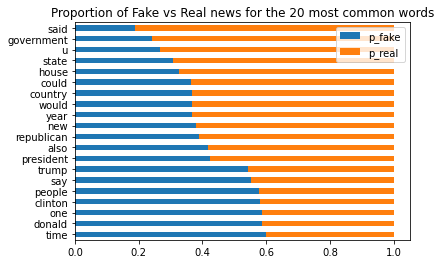

In [118]:
_percentFakevsReal(word_counts)

# Takeaways

    - We found that the the most common fake news words were time, one, donald, people, clinton

In [145]:
def _wordcounts_all(word_counts):
    word_counts_all = (word_counts
     [(word_counts.fake > 10) & (word_counts['all'] > 10)]
     .assign(ratio=lambda df: df.fake / (df['all'] + .01))
     .sort_values(by='all', ascending = False)
     .pipe(lambda df: pd.concat([df.head(), df.head(20)])))
    
    return  word_counts_all

In [146]:
word_counts_all =  _wordcounts_all(word_counts)

In [147]:
word_counts_all 

,all,fake,real,ratio
said,120723,22915,97808,0.189815
trump,117346,63612,53734,0.542089
u,55465,14809,40656,0.266997
state,51837,15895,35942,0.306634
would,49318,18163,31155,0.368283
said,120723,22915,97808,0.189815
trump,117346,63612,53734,0.542089
u,55465,14809,40656,0.266997
state,51837,15895,35942,0.306634
would,49318,18163,31155,0.368283


    - 50 percent of all had trump as a keyword, 54 percent of these instances are fake.
    - The higest amkount of instances is associated with the word said at 118359 instances.
    - The word said only occured in 19% of fake articles, while 81% where associated with real news articles.
    - The second highest ammount of intances is associated with the word/name trump at 115797 intances and making up over 53% being in fake news realted articles. 

In [148]:
def _wordcount_fake(word_counts):
    
    word_counts_fake = (word_counts
     [(word_counts.fake > 10) & (word_counts.real > 10)]
     .assign(ratio=lambda df: df.fake / (df.real + .01))
     .sort_values(by='ratio', ascending = False)
     .pipe(lambda df: pd.concat([df.head(), df.head(20)])))
    
    return word_counts_fake

In [149]:
word_counts_fake = _wordcount_fake(word_counts)

In [150]:
word_counts_fake

,all,fake,real,ratio
cop,956,940,16,58.713304
hannity,955,939,16,58.650843
gop,3787,3696,91,40.610922
damn,440,428,12,35.636969
rant,472,459,13,35.280553
cop,956,940,16,58.713304
hannity,955,939,16,58.650843
gop,3787,3696,91,40.610922
damn,440,428,12,35.636969
rant,472,459,13,35.280553


     - Fake news articles tend to have words with negative connotations such as bigoted, disgusting, pathetic, insane, and idiot. 
     - 

In [151]:
def _wordcount_real(word_counts):

    word_counts_real = (word_counts
     [(word_counts.fake > 10) & (word_counts.real > 10)]
     .assign(ratio=lambda df: df.real / (df.fake + .01))
     .sort_values(by='ratio', ascending = False)
     .pipe(lambda df: df.head(20)))
    
    return word_counts_real

In [152]:
word_counts_real = _wordcount_real(word_counts)

In [153]:
word_counts_real

,all,fake,real,ratio
thats,1166,17,1149,67.548501
im,1229,18,1211,67.240422
lebanese,671,11,660,59.945504
dont,2044,38,2006,52.775585
parliamentary,804,15,789,52.564957
km,704,14,690,49.250535
ankara,892,18,874,48.528595
beijing,2128,44,2084,47.352874
beirut,524,11,513,46.594005
hong,562,12,550,45.795171


    - Real news articles use words that are more centered around world events and places.
    - Ankara is the captiol of turkey
    - sdf may be syarian democratic forces or a type of geospacial file type.

# Wordclouds for Real-Fake-Combined

In [103]:
from wordcloud import WordCloud

In [163]:
def _word_clouds_rfa(all_words, fake_words, real_words): 
    all_cloud = WordCloud(background_color='black', height=1000, width=400, colormap="seismic_r").generate(' '.join(all_words))
    fake_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(fake_words))
    real_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(real_words))

    plt.figure(figsize=(10, 8))
    axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

    axs[0].imshow(all_cloud)
    axs[1].imshow(fake_cloud)
    axs[2].imshow(real_cloud)

    axs[0].set_title('All Words')
    axs[1].set_title('Fake')
    axs[2].set_title('Real')

    for ax in axs: ax.axis('off')
        
    return _word_clouds_rfa

<function __main__._word_clouds_rfa(all_words, fake_words, real_words)>

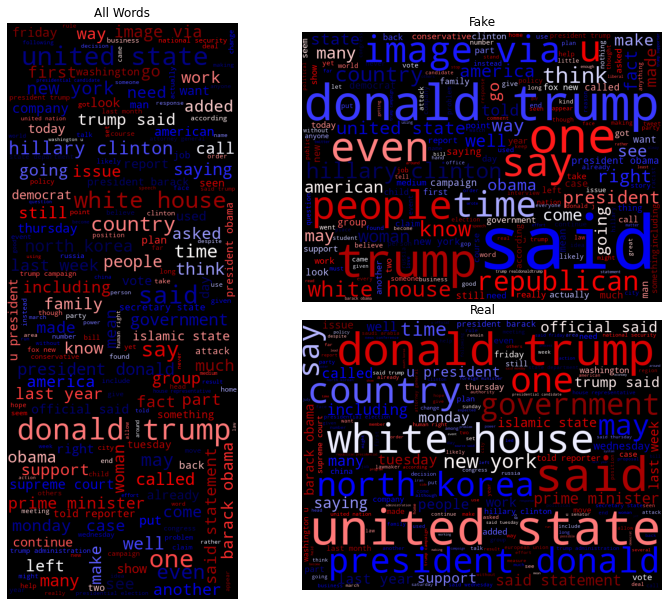

In [164]:
_word_clouds_rfa(all_words, fake_words, real_words)

# Takeaways

    - Said and donald trump are the tope two words in the fake news related articles. 
    - This could be related to some quates that were infered by the press or missleading. (id like to look into this deeper and actualy compare if these statments match what trump acutaly said)
    - 

In [105]:
import numpy as np
from PIL import Image

# Bigrams (Fake - Real)

In [106]:
top_20_fake_bigrams = (pd.Series(nltk.ngrams(fake_words, 2))
                      .value_counts()
                      .head(20))

top_20_fake_bigrams.head()

(donald, trump)       11299
(image, via)           6194
(hillary, clinton)     5002
(white, house)         4832
(united, state)        4601
dtype: int64

In [165]:
def _fake_bigrams(fake_words): 
    top_20_fake_bigrams = (pd.Series(nltk.ngrams(fake_words, 2))
                          .value_counts()
                          .head(20))

    top_20_fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

    plt.title('20 Most frequently occuring fake bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_fake_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)

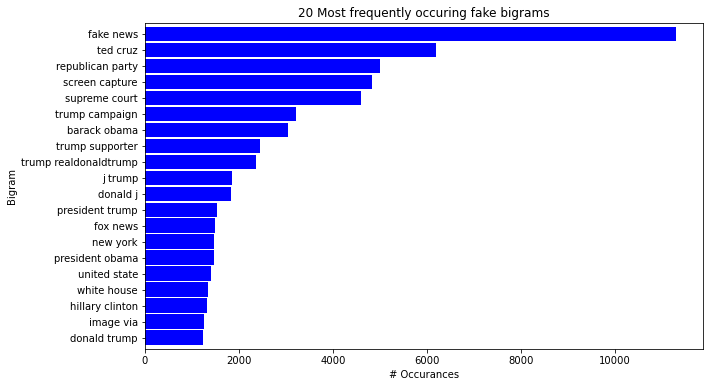

In [166]:
_fake_bigrams(fake_words)

# Takeaways 

    - The bigrams for fake news articles are filled with "in house" events and places such as supreme count, republican part, and trumps twitter tag. 

In [108]:
top_20_real_bigrams = (pd.Series(nltk.ngrams(real_words, 2))
                      .value_counts()
                      .head(20))

top_20_real_bigrams.head()

(united, state)        12014
(donald, trump)        10051
(white, house)          8304
(president, donald)     5866
(north, korea)          5482
dtype: int64

In [167]:
def _real_bigrams(real_words): 
    top_20_real_bigrams = (pd.Series(nltk.ngrams(real_words, 2))
                          .value_counts()
                          .head(20))

    top_20_real_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

    plt.title('20 Most frequently occuring real bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_real_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)

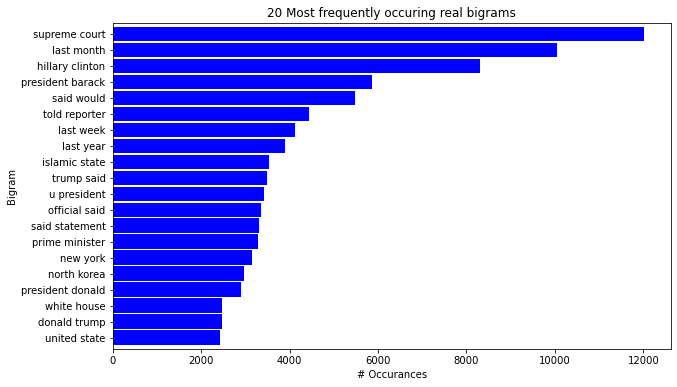

In [168]:
_real_bigrams(real_words)

# Takeaways 

    - The bigrams for real news are filled with phrases that repesernt world events and significant moments in time. 

In [110]:
top_20_real_trigrams2 = (pd.Series(nltk.ngrams(real_words, 3))
                      .value_counts()
                      .head(20))

top_20_real_trigrams2.head()

(president, donald, trump)     5796
(u, president, donald)         2493
(president, barack, obama)     1992
(white, house, said)            953
(president, barack, obamas)     900
dtype: int64

# Trigrams (Real - Fake)

In [169]:
def _real_trigrams(real_words):    
    top_20_real_trigrams2 = (pd.Series(nltk.ngrams(real_words, 3))
                          .value_counts()
                          .head(20))

    top_20_real_trigrams2.head()

    top_20_real_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

    plt.title('20 Most frequently occuring real Trigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_real_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
    _ = plt.yticks(ticks, labels)

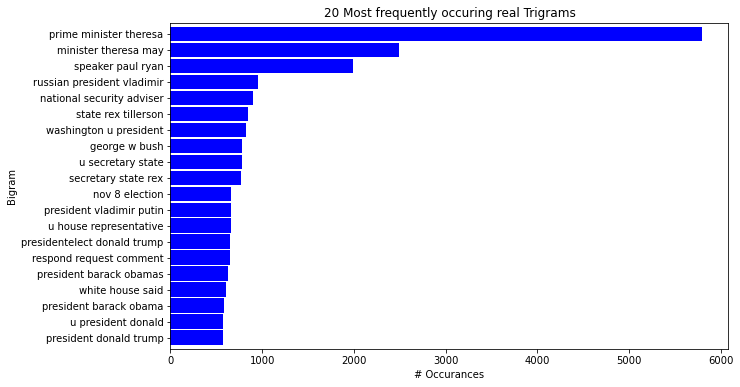

In [170]:
_real_trigrams(real_words)

# Takeaways

    - 

In [112]:
top_20_fake_trigrams2 = (pd.Series(nltk.ngrams(fake_words, 3))
                      .value_counts()
                      .head(20))

top_20_fake_trigrams2.head()

(donald, j, trump)             1818
(j, trump, realdonaldtrump)    1524
(new, york, time)              1068
(21st, century, wire)           954
(image, via, video)             787
dtype: int64

In [171]:
def _fake_trigrams(fake_words):
    top_20_fake_trigrams2 = (pd.Series(nltk.ngrams(fake_words, 3))
                          .value_counts()
                          .head(20))

    top_20_fake_trigrams2.head()

    top_20_fake_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

    plt.title('20 Most frequently occuring fake Trigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_fake_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
    _ = plt.yticks(ticks, labels)

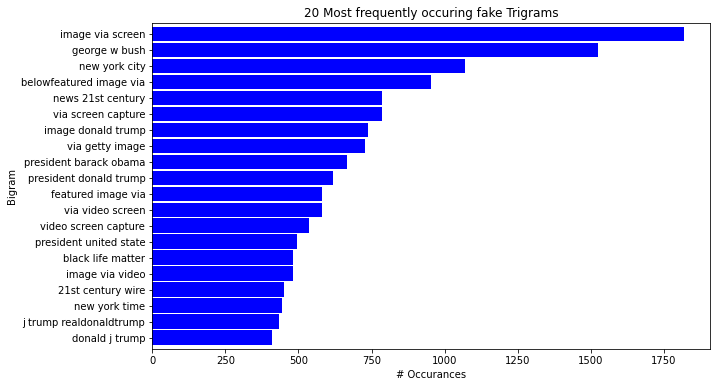

In [172]:
_fake_trigrams(fake_words)

# Quadgrams

In [173]:
top_20_fake_quadgrams = (pd.Series(nltk.ngrams(fake_words, 4))
                      .value_counts()
                      .head(20))

top_20_fake_quadgrams.head()

(donald, j, trump, realdonaldtrump)    1524
(image, via, video, screen)             660
(via, video, screen, capture)           629
(news, 21st, century, wire)             479
(image, via, screen, capture)           404
dtype: int64

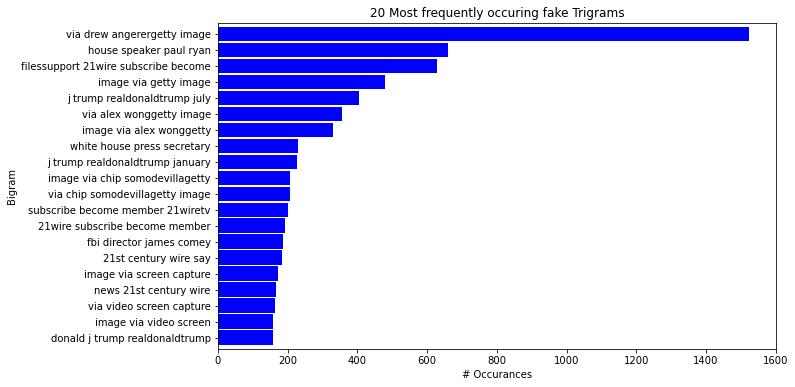

In [174]:
top_20_fake_quadgrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_quadgrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] + ' ' + t[3])
_ = plt.yticks(ticks, labels)

# Takeaways

     - 

# Wordclouds for Single-Bigram-Trigram